In [1]:
import pandas as pd

In [38]:
# Load the first file into a dataset
marketing = pd.read_csv('Marketing.csv')

# Load the second file into a dataset
ca = pd.read_csv('CA.csv')

# Display the first few rows of each dataset


In [40]:
marketing.sample(5)

,Date,Marketing Spend,Promo
115,01/05/2021,805.636364,No Promo
22,16/01/2021,1169.900000,Promotion Blue
39,04/02/2021,1336.000000,No Promo
55,22/02/2021,837.100000,No Promo
98,11/04/2021,1020.090909,Promotion Blue


In [3]:
ca.head()

,Date,Day_Name,Visitors,Revenue
0,09/11/2020,Monday,707,5211
1,10/11/2020,Tuesday,1455,10386
2,11/11/2020,Wednesday,1520,12475
3,12/11/2020,Thursday,1726,14414
4,13/11/2020,Friday,2134,20916


In [5]:
ca.shape

(119, 4)

In [6]:
marketing.shape

(124, 3)

In [43]:
df = pd.merge(ca, marketing, on='Date', how='outer')
df

,Date,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,01/01/2021,Friday,2032.0,21428.0,1948.000000,Promotion Blue
1,01/02/2021,Monday,1407.0,10479.0,NaN,NaN
2,01/03/2021,Monday,1786.0,13212.0,NaN,NaN
3,01/04/2021,NaN,NaN,NaN,2921.000000,Promotion Blue
4,01/05/2021,NaN,NaN,NaN,805.636364,No Promo
...,...,...,...,...,...,...
170,30/11/2020,Monday,1541.0,9144.0,NaN,NaN
171,30/12/2020,Wednesday,1328.0,9180.0,918.000000,Promotion Red
172,31/01/2021,Sunday,1582.0,9316.0,1035.111111,No Promo
173,31/03/2021,NaN,NaN,NaN,1869.625000,Promotion Red


In [45]:
df.isnull().sum()
df.fillna({"Marketing Spend": 0, "Promo": "No Promo"}, inplace=True)
df.isnull().sum()

Date                0
Day_Name           56
Visitors           56
Revenue            56
Marketing Spend     0
Promo               0
dtype: int64

In [46]:
df

,Date,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,01/01/2021,Friday,2032.0,21428.0,1948.000000,Promotion Blue
1,01/02/2021,Monday,1407.0,10479.0,0.000000,No Promo
2,01/03/2021,Monday,1786.0,13212.0,0.000000,No Promo
3,01/04/2021,NaN,NaN,NaN,2921.000000,Promotion Blue
4,01/05/2021,NaN,NaN,NaN,805.636364,No Promo
...,...,...,...,...,...,...
170,30/11/2020,Monday,1541.0,9144.0,0.000000,No Promo
171,30/12/2020,Wednesday,1328.0,9180.0,918.000000,Promotion Red
172,31/01/2021,Sunday,1582.0,9316.0,1035.111111,No Promo
173,31/03/2021,NaN,NaN,NaN,1869.625000,Promotion Red


In [49]:
df.dtypes

Date                object
Day_Name            object
Visitors           float64
Revenue            float64
Marketing Spend    float64
Promo               object
dtype: object

In [48]:
df.groupby(['Promo']).size()

Promo
No Promo          102
Promotion Blue     35
Promotion Red      38
dtype: int64

In [8]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.head()

,Date,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,Monday,707,5211,1354.933616,NaN
1,10/11/2020,Tuesday,1455,10386,1354.933616,NaN
2,11/11/2020,Wednesday,1520,12475,1354.933616,NaN
3,12/11/2020,Thursday,1726,14414,1354.933616,NaN
4,13/11/2020,Friday,2134,20916,1354.933616,NaN


In [ ]:
# Remplacer les valeurs manquantes dans les colonnes catégorielles par la valeur la plus fréquente
df['Promo'].fillna(df['Promo'].mode()[0], inplace=True)
df.head()

C:\Users\yohar\AppData\Local\Temp\ipykernel_54268\1837462654.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Promo'].fillna(df['Promo'].mode()[0], inplace=True)


,Date,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,Monday,707,5211,1354.933616,No Promo
1,10/11/2020,Tuesday,1455,10386,1354.933616,No Promo
2,11/11/2020,Wednesday,1520,12475,1354.933616,No Promo
3,12/11/2020,Thursday,1726,14414,1354.933616,No Promo
4,13/11/2020,Friday,2134,20916,1354.933616,No Promo


In [10]:
df.dtypes

Date                object
Day_Name            object
Visitors             int64
Revenue              int64
Marketing Spend    float64
Promo               object
dtype: object

In [53]:
# Convertir la colonne 'Date' au format datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [52]:
df.dtypes

Date               datetime64[ns]
Day_Name                   object
Visitors                  float64
Revenue                   float64
Marketing Spend           float64
Promo                      object
dtype: object

In [13]:
df.rename(columns={'Day_Name': 'Day'}, inplace=True)
df.head()

,Date,Day,Visitors,Revenue,Marketing Spend,Promo
0,2020-11-09,Monday,707,5211,1354.933616,No Promo
1,2020-11-10,Tuesday,1455,10386,1354.933616,No Promo
2,2020-11-11,Wednesday,1520,12475,1354.933616,No Promo
3,2020-11-12,Thursday,1726,14414,1354.933616,No Promo
4,2020-11-13,Friday,2134,20916,1354.933616,No Promo


In [58]:
df['Month'] = df['Date'].dt.month
df.head()

,Date,Day_Name,Visitors,Revenue,Marketing Spend,Promo,Month
0,2021-01-01,Friday,2032.0,21428.0,1948.000000,Promotion Blue,1
1,2021-02-01,Monday,1407.0,10479.0,0.000000,No Promo,2
2,2021-03-01,Monday,1786.0,13212.0,0.000000,No Promo,3
3,2021-04-01,NaN,NaN,NaN,2921.000000,Promotion Blue,4
4,2021-05-01,NaN,NaN,NaN,805.636364,No Promo,5


In [37]:
df.describe(include='number')

,Visitors,Revenue,Marketing Spend,Month,Marketing Proportion
count,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1667.487395,12999.352941,1354.933616,6.067227,11.021627
std,524.428032,6063.090384,573.539448,5.001239,2.977820
min,488.000000,2898.000000,322.000000,1.000000,3.952779
25%,1319.500000,8932.000000,983.544445,1.000000,9.135338
50%,1582.000000,11679.000000,1354.933616,3.000000,11.111111
75%,2012.500000,16131.000000,1354.933616,12.000000,12.500000
max,4139.000000,36283.000000,4535.375000,12.000000,26.001413


### Commentaire sur les statistiques descriptives des colonnes

1. **Visitors (Visiteurs)** :
    - **Count** : 119 jours de données.
    - **Mean** : En moyenne, il y a environ 1667 visiteurs par jour.
    - **Std** : La variation est significative avec un écart-type de 524.
    - **Min/Max** : Le nombre de visiteurs varie entre 488 et 4139.
    - **Quartiles** : 50% des jours ont entre 1319 et 2012 visiteurs.

2. **Revenue (Revenus)** :
    - **Count** : 119 jours de données.
    - **Mean** : Le revenu moyen quotidien est de 12,999.
    - **Std** : L'écart-type est élevé (6063), indiquant une forte variabilité.
    - **Min/Max** : Les revenus varient entre 2898 et 36283.
    - **Quartiles** : La moitié des jours ont des revenus entre 8932 et 16131.

3. **Marketing Spend (Dépenses Marketing)** :
    - **Count** : 119 jours de données.
    - **Mean** : Les dépenses marketing moyennes sont de 1354.
    - **Std** : L'écart-type est de 573, montrant une certaine variabilité.
    - **Min/Max** : Les dépenses varient entre 322 et 4535.
    - **Quartiles** : La majorité des jours ont des dépenses autour de 1354 (valeur médiane et 75e percentile identiques).

4. **Month (Mois)** :
    - **Count** : 119 jours de données.
    - **Mean** : La moyenne est de 6, ce qui correspond à une répartition sur plusieurs mois.
    - **Min/Max** : Les données couvrent les mois de janvier (1) à décembre (12).

5. **Marketing Proportion (Proportion Marketing)** :
    - **Count** : 119 jours de données.
    - **Mean** : En moyenne, les dépenses marketing représentent 11% des revenus.
    - **Std** : L'écart-type est de 2.97, indiquant une certaine variabilité.
    - **Min/Max** : La proportion varie entre 3.95% et 26%.
    - **Quartiles** : La majorité des jours ont une proportion marketing entre 9.13% et 12.5%.

Ces statistiques montrent une forte variabilité dans les visiteurs, les revenus et les dépenses marketing, ce qui peut être influencé par des facteurs tels que les promotions ou les jours spécifiques. La proportion marketing reste relativement stable, avec une moyenne autour de 11%.


In [16]:
# Obtenir les types uniques de promotions
promotion_types = df['Promo'].unique()
print(f"Types de promotions : {promotion_types}")
print(f"Nombre de types de promotions : {len(promotion_types)}")

Types de promotions : ['No Promo' 'Promotion Red' 'Promotion Blue']
Nombre de types de promotions : 3


In [18]:
filtered_data = df[(df['Day'] == 'Monday') & (df['Marketing Spend'] > 1200)]
filtered_data

,Date,Day,Visitors,Revenue,Marketing Spend,Promo,Month
0,2020-11-09,Monday,707,5211,1354.933616,No Promo,11
7,2020-11-16,Monday,1548,10072,1354.933616,No Promo,11
14,2020-11-23,Monday,2632,34278,1354.933616,No Promo,11
21,2020-11-30,Monday,1541,9144,1354.933616,No Promo,11
28,2020-12-07,Monday,1584,9612,1354.933616,No Promo,12
35,2020-12-14,Monday,1772,11679,1354.933616,No Promo,12
42,2020-12-21,Monday,1605,12038,1354.933616,No Promo,12
77,2021-01-25,Monday,1430,10925,1365.625000,Promotion Blue,1
84,2021-02-01,Monday,1407,10479,1354.933616,No Promo,2
112,2021-03-01,Monday,1786,13212,1354.933616,No Promo,3


In [21]:
best_revenue_data = df.loc[df['Revenue'].idxmax()]
best_revenue_data

Date               2020-12-26 00:00:00
Day                           Saturday
Visitors                          2678
Revenue                          36283
Marketing Spend               4535.375
Promo                   Promotion Blue
Month                               12
Name: 47, dtype: object

In [22]:
# Chiffre d'affaires total
total_revenue = df['Revenue'].sum()
print(f"Chiffre d'affaires total : {total_revenue}")

# Minimum dans les dépenses marketing
min_marketing_spend = df['Marketing Spend'].min()
print(f"Minimum des dépenses marketing : {min_marketing_spend}")

# Moyenne des visiteurs
average_visitors = df['Visitors'].mean()
print(f"Moyenne des visiteurs : {average_visitors}")

Chiffre d'affaires total : 1546923
Minimum des dépenses marketing : 322.0
Moyenne des visiteurs : 1667.4873949579833


In [23]:
# Regrouper par mois et additionner les visiteurs
monthly_visitors = df.groupby('Month')['Visitors'].sum()

# Identifier le mois avec le maximum de visiteurs
max_visitors_month = monthly_visitors.idxmax()
max_visitors_count = monthly_visitors.max()

print(f"Le mois contenant le plus de visiteurs est : {max_visitors_month} avec {max_visitors_count} visiteurs.")

Le mois contenant le plus de visiteurs est : 12 avec 54842 visiteurs.


In [25]:
daily_averages = df.groupby('Day')[['Revenue', 'Marketing Spend', 'Visitors']].mean()
daily_averages

,Revenue,Marketing Spend,Visitors
Day,,,
Friday,17743.411765,1642.495975,1992.647059
Monday,11024.058824,1163.820470,1544.411765
Saturday,10930.058824,1366.610410,1357.352941
Sunday,11338.882353,1228.364315,1562.882353
Thursday,17835.176471,1704.760514,2248.764706
Tuesday,10388.823529,1103.331175,1432.117647
Wednesday,11735.058824,1275.152448,1534.235294


In [26]:
average_by_promotion = df.groupby('Promo')[['Revenue', 'Marketing Spend', 'Visitors']].mean()
average_by_promotion

,Revenue,Marketing Spend,Visitors
Promo,,,
No Promo,12116.506329,1242.275681,1641.481013
Promotion Blue,17764.761905,1943.499603,1891.285714
Promotion Red,11403.105263,1172.833147,1528.263158


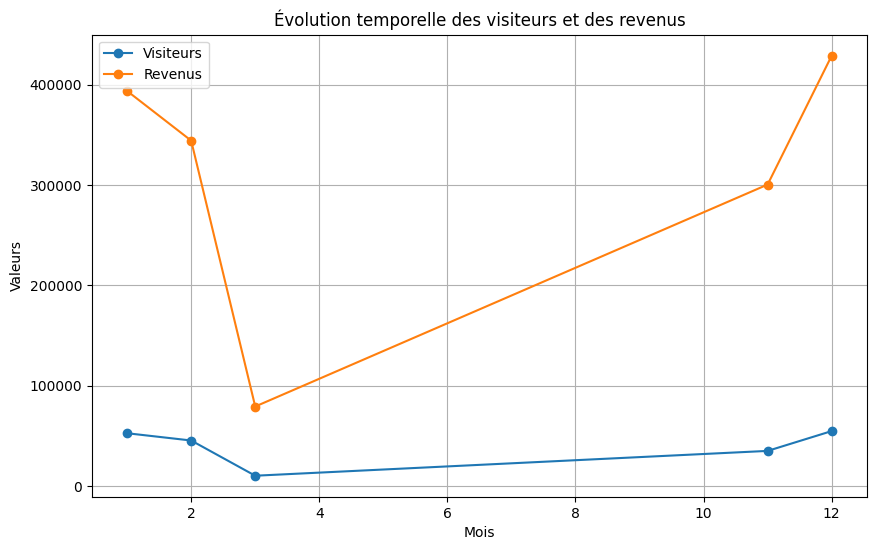

In [27]:
import matplotlib.pyplot as plt

# Regrouper par mois pour une vue mensuelle
monthly_data = df.groupby('Month')[['Visitors', 'Revenue']].sum()

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Visitors'], label='Visiteurs', marker='o')
plt.plot(monthly_data.index, monthly_data['Revenue'], label='Revenus', marker='o')

# Ajouter des titres et des légendes
plt.title("Évolution temporelle des visiteurs et des revenus")
plt.xlabel("Mois")
plt.ylabel("Valeurs")
plt.legend()
plt.grid(True)
plt.show()

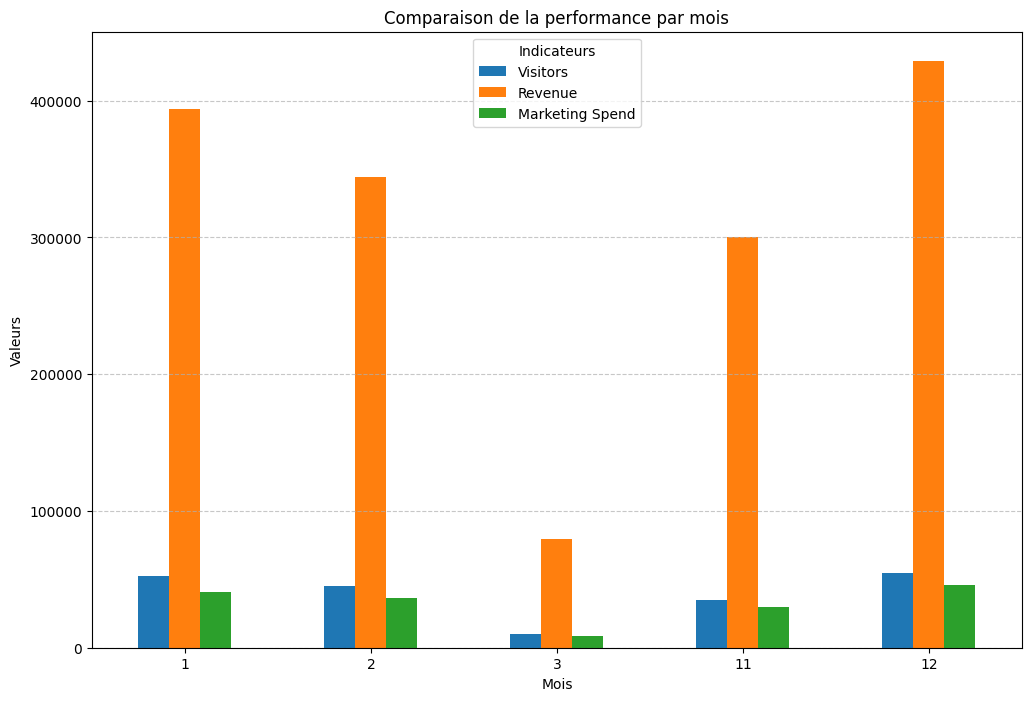

In [28]:
# Regrouper par mois pour obtenir les sommes mensuelles
monthly_performance = df.groupby('Month')[['Visitors', 'Revenue', 'Marketing Spend']].sum()

# Tracer le graphique
monthly_performance.plot(kind='bar', figsize=(12, 8))

# Ajouter des titres et des étiquettes
plt.title("Comparaison de la performance par mois")
plt.xlabel("Mois")
plt.ylabel("Valeurs")
plt.xticks(rotation=0)
plt.legend(title="Indicateurs")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()

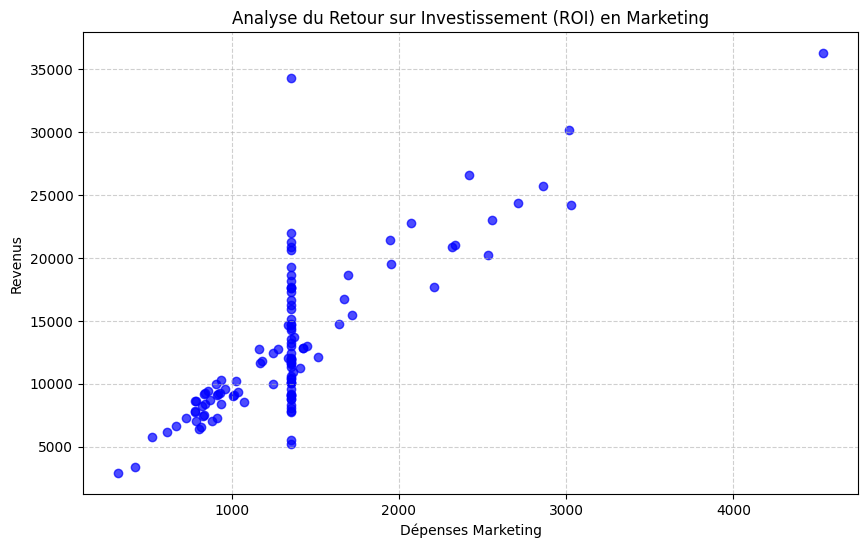

In [29]:
# Tracer un diagramme en nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(df['Marketing Spend'], df['Revenue'], alpha=0.7, color='blue')

# Ajouter des titres et des étiquettes
plt.title("Analyse du Retour sur Investissement (ROI) en Marketing")
plt.xlabel("Dépenses Marketing")
plt.ylabel("Revenus")
plt.grid(True, linestyle='--', alpha=0.6)

# Afficher le graphique
plt.show()

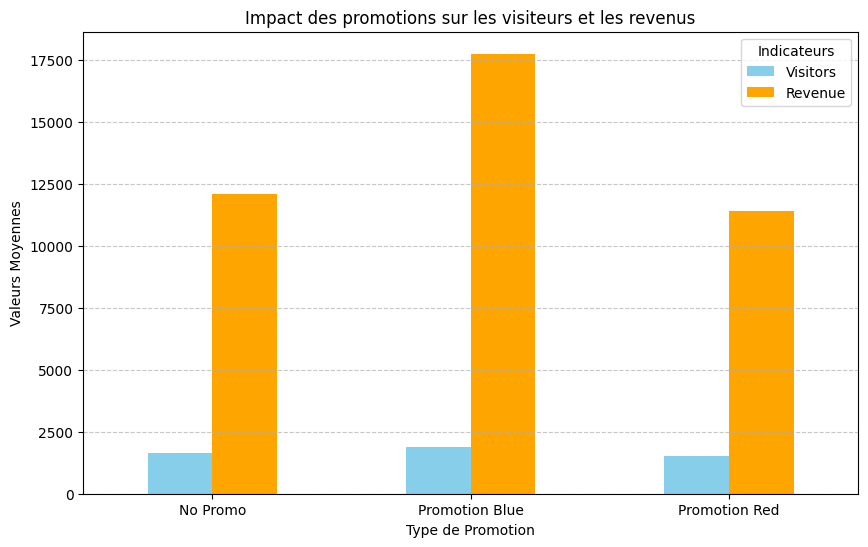

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Calculer les moyennes pour chaque type de promotion
promo_data = average_by_promotion[['Visitors', 'Revenue']]

# Tracer le graphique
promo_data.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])

# Ajouter des titres et des étiquettes
plt.title("Impact des promotions sur les visiteurs et les revenus")
plt.xlabel("Type de Promotion")
plt.ylabel("Valeurs Moyennes")
plt.xticks(rotation=0)
plt.legend(title="Indicateurs")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()

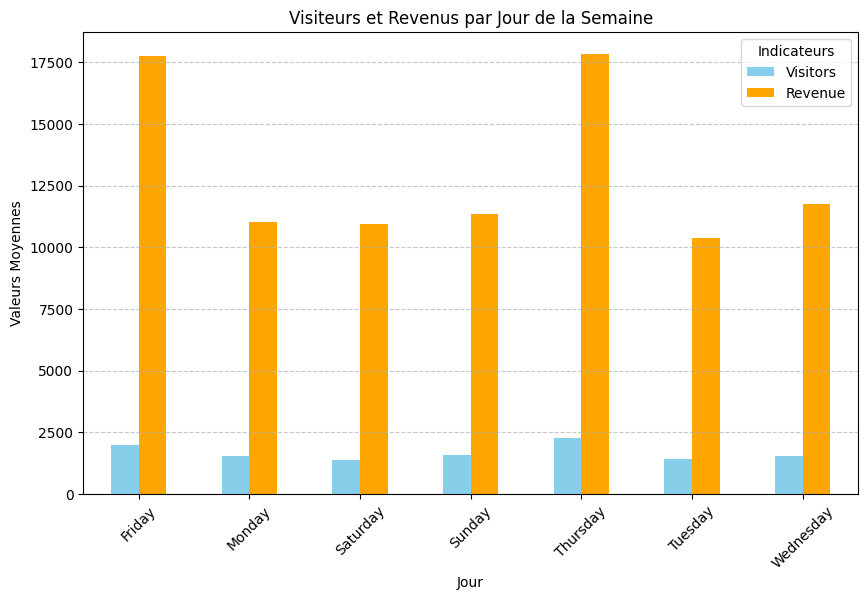

In [31]:
import seaborn as sns

import matplotlib.pyplot as plt

# Préparer les données pour le graphique
daily_data = daily_averages[['Visitors', 'Revenue']]

# Tracer un graphique en barres
daily_data.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])

# Ajouter des titres et des étiquettes
plt.title("Visiteurs et Revenus par Jour de la Semaine")
plt.xlabel("Jour")
plt.ylabel("Valeurs Moyennes")
plt.xticks(rotation=45)
plt.legend(title="Indicateurs")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()

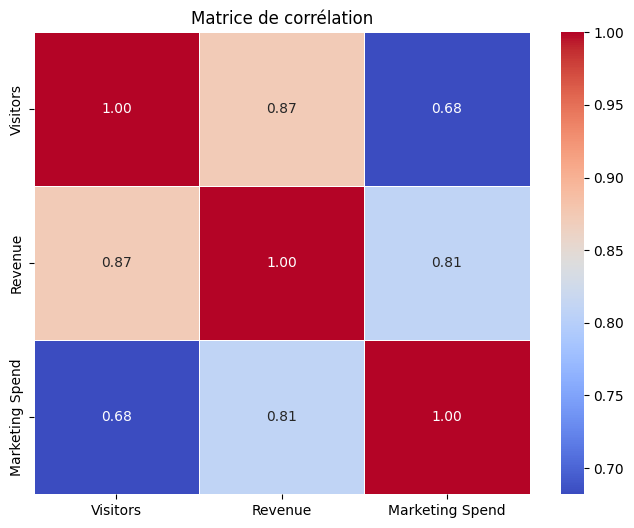

In [32]:
# Calculer la matrice de corrélation
correlation_matrix = df[['Visitors', 'Revenue', 'Marketing Spend']].corr()

# Tracer la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Ajouter des titres et des étiquettes
plt.title("Matrice de corrélation")
plt.show()

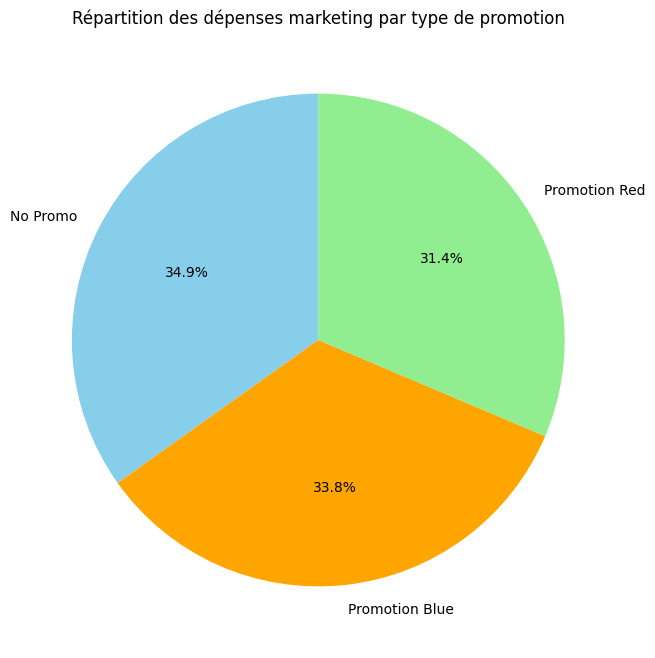

In [34]:
# Calculer la proportion des dépenses marketing par rapport aux revenus
df['Marketing Proportion'] = (df['Marketing Spend'] / df['Revenue']) * 100

# Moyenne des proportions par type de promotion
proportion_data = df.groupby('Promo')['Marketing Proportion'].mean()

# Tracer le graphique circulaire
plt.figure(figsize=(8, 8))
proportion_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'lightgreen'])

# Ajouter un titre
plt.title("Répartition des dépenses marketing par type de promotion")
plt.ylabel('')  # Supprimer l'étiquette de l'axe Y
plt.show()

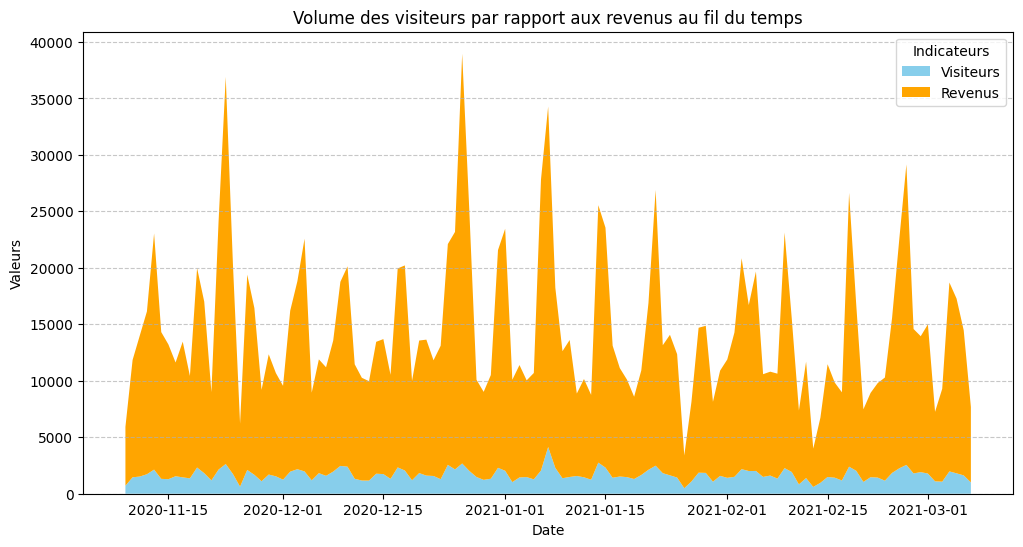

In [35]:
# Préparer les données pour le graphique
stacked_data = df.groupby('Date')[['Visitors', 'Revenue']].sum()

# Tracer le graphique en aire empilée
plt.figure(figsize=(12, 6))
plt.stackplot(stacked_data.index, stacked_data['Visitors'], stacked_data['Revenue'], labels=['Visiteurs', 'Revenus'], colors=['skyblue', 'orange'])

# Ajouter des titres et des étiquettes
plt.title("Volume des visiteurs par rapport aux revenus au fil du temps")
plt.xlabel("Date")
plt.ylabel("Valeurs")
plt.legend(title="Indicateurs")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()